<a href="https://colab.research.google.com/github/KennyImarah/10DaysOfXamarin/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("The Dataframe contains", df.shape[0], 'rows, and', df.shape[1], "columns")

The Dataframe contains 1898 rows, and 9 columns


#### Observations:  The Dataframe contains 1898 rows, and 9 columns. The rows are indexed from 0 to 1897 and a total of 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The summary of the data types: float64(1), int64(4), object(4)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in the data set as evidenced above

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T  # get numerical statistical information

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
df.describe(include= 'all').T  # view all statistical information

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


It takes a minimum of 20.00 minutes, an averate time of 27.00, and a maximum time of 35.00 minutes for food to be prepared after an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

df['rating'].apply(type).value_counts()   # Count the total entires for 'rating'

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
df['rating'].unique()  # Check the detail of rating data types

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['rating'] = df['rating'].replace(['Not given'],np.nan)  # replace 'Not given entry to NAN

In [ ]:
df['rating'] = df['rating'].astype(float)  # convert the rating data type to float

In [ ]:
df['rating'].unique()  # confirming the changed data type

array([nan,  5.,  3.,  4.])

In [ ]:
df['rating'].apply(type).value_counts() # check detail of the entry count

<class 'float'>    1898
Name: rating, dtype: int64

In [ ]:
not_rated = df['rating'].isna().sum()  # check the count of entires withut rating

print(not_rated)

736


In [ ]:
# Making a list of all categorical variables
cat_cols =  ['rating']

In [ ]:
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: rating, dtype: float64
--------------------------------------------------


#### Observations: 736 orders of are not rated. 736 not rated of a total of 1898 orders.






### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

The rating is slightly skewed to the right. More people gave more than 4 in their rating. There are more of people who did not rate their order than the number of people that giving any level of rating.

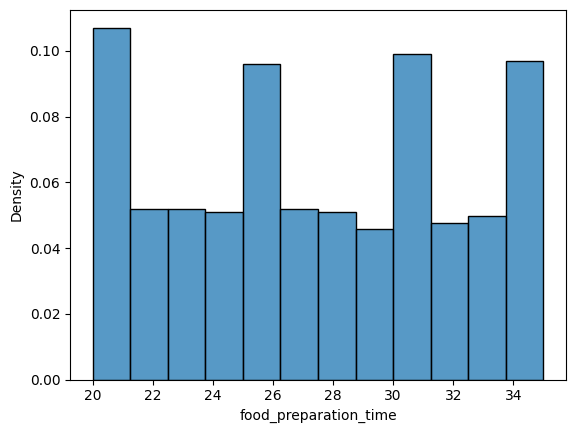

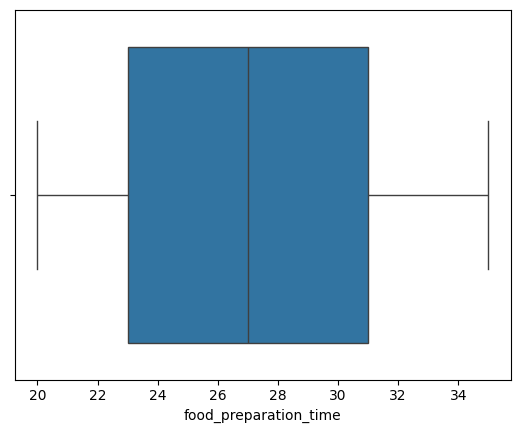

In [ ]:
#Observing the food_preparation_time column density using histplot and boxplot

sns.histplot(data=df,x='food_preparation_time',stat='density')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

The food_preparation_time is evenly distributed. There is an average time of  26 minutes of time for preparation across the restaurants.

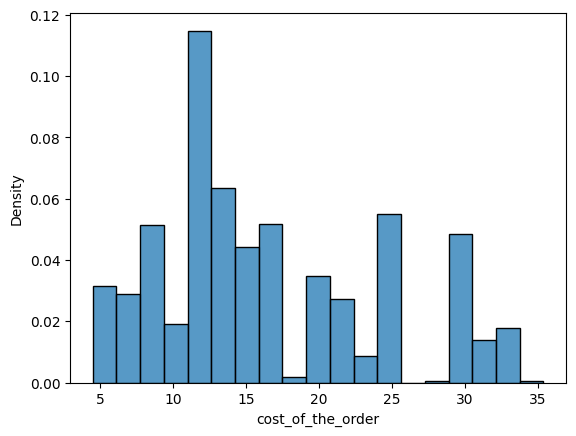

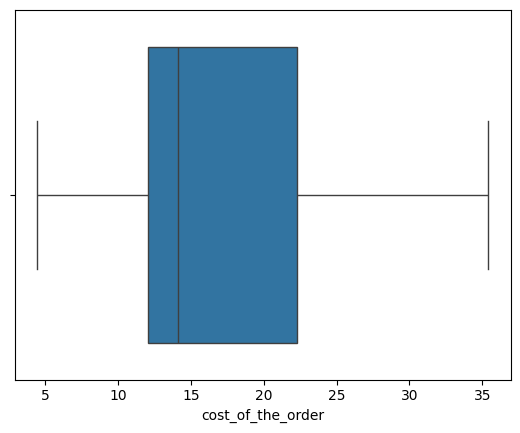

In [ ]:
#Observing cost_of_the_order column density using histplot and boxplot

sns.histplot(data=df,x='cost_of_the_order',stat='density')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [ ]:
df.loc[df['cost_of_the_order']>25].shape

(305, 9)

The cost_of_the_order is right skewed. Approximately 50% of the orders are below USD14 in price. 305 of the total order cost more that $25

There are 305 orders that are with order value that is above $25

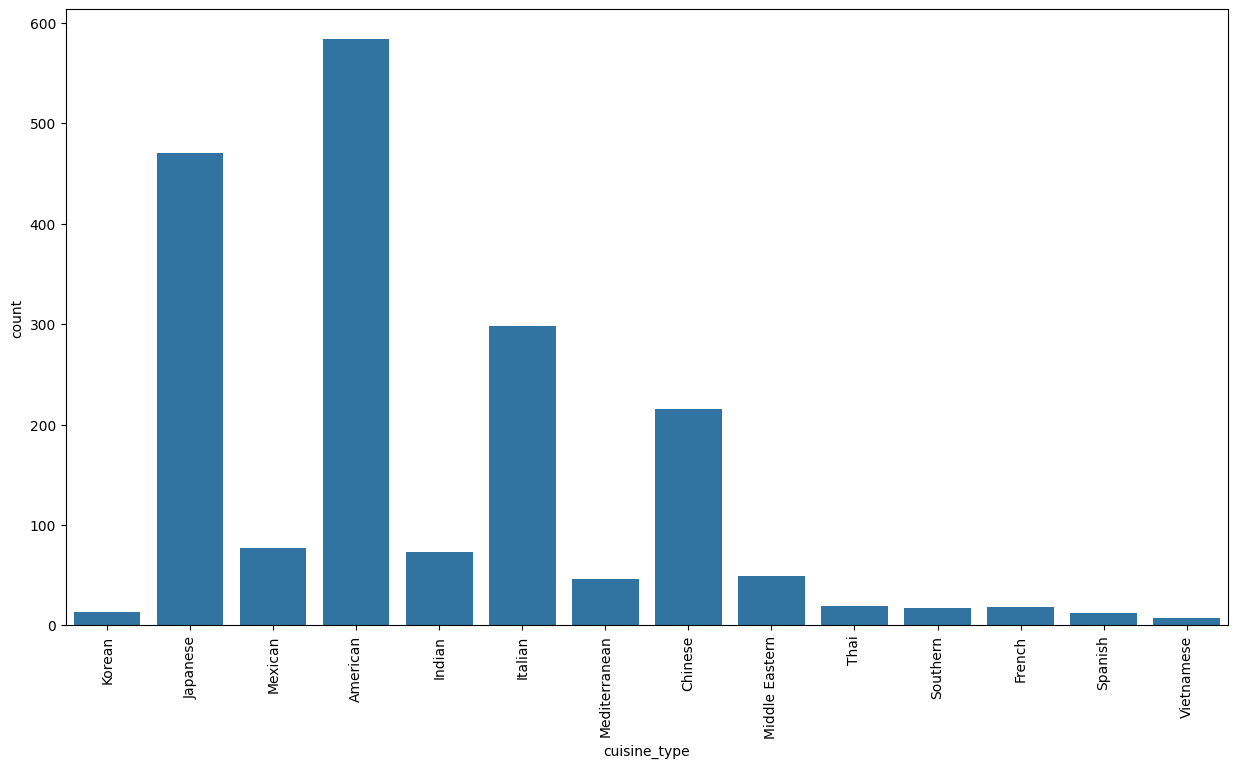

In [ ]:
# Exploring details of cuisine_type column density using histplot and boxplot

plt.figure(figsize=(15,8))
sns.countplot(data=df,x='cuisine_type')

plt.xticks(rotation=90)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

More people ordered for American cuisin than any other food type in the data set. Japanese cuisine is the second highest in orders, and Vietnamese quisine is the lowest

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


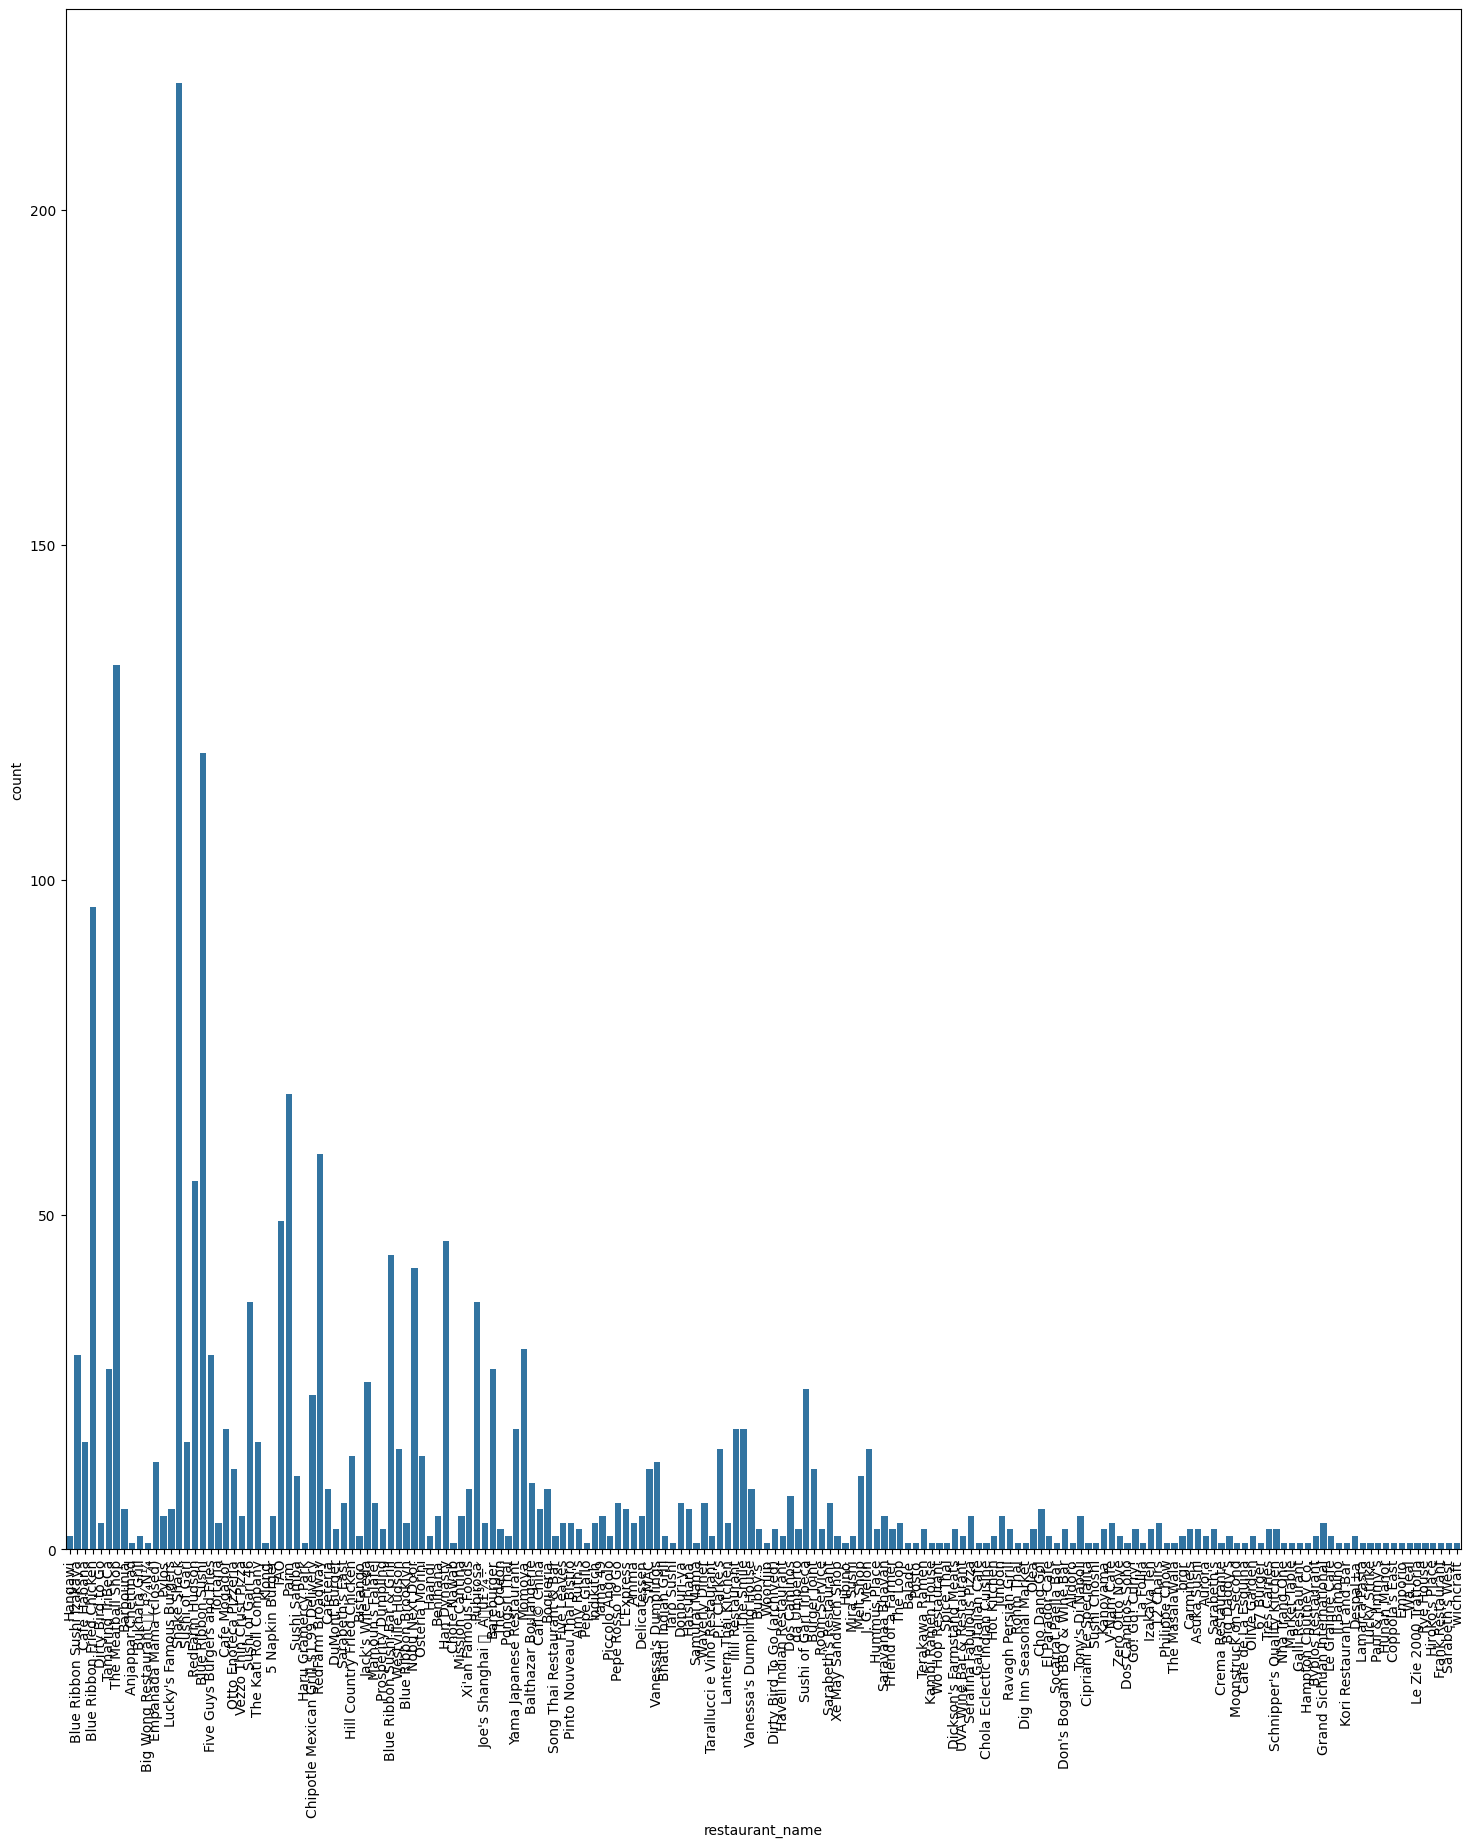

In [ ]:
# Write the code here

plt.figure(figsize=(18,20));
sns.countplot(data=df, x='restaurant_name');

plt.xticks(rotation=90)
plt.show()



In [ ]:
result = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 70]
print(result)

      order_id  customer_id            restaurant_name cuisine_type  \
3      1477334       106968  Blue Ribbon Fried Chicken     American   
6      1477894       157711          The Meatball Shop      Italian   
12     1476966       129969  Blue Ribbon Fried Chicken     American   
15     1477414        66222                Shake Shack     American   
19     1477354        67487          Blue Ribbon Sushi     Japanese   
...        ...          ...                        ...          ...   
1887   1476873       237616                Shake Shack     American   
1888   1477353       106324          The Meatball Shop      Italian   
1891   1476981       138586                Shake Shack     American   
1895   1477819        35309          Blue Ribbon Sushi     Japanese   
1897   1478056       120353          Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
3                 29.20         Weekend     3.0                     25   

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
df['restaurant_name'] = df['restaurant_name'].astype(str).astype(int(int))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'type'

In [ ]:
df.sort_values(by=['restaurant_name'])

In [ ]:

df.sort_values(by='restaurant_name', key=lambda col: col.str.lower())

In [ ]:
top 5 restaurants = df.sort_values('restaurant_name', ascending=False).head()

In [ ]:
df['restaurant_orders'] = df['restaurant_name'].drop_duplicates().sort_values(ascending=False)

df.head()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='restaurant_orders')

plt.xticks(rotation=90)

plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

ValueError: Could not interpret value `restaurant_orders` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x800 with 0 Axes>

In [ ]:
df.loc['delivery_time']

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<Axes: xlabel='day_of_the_week', ylabel='count'>

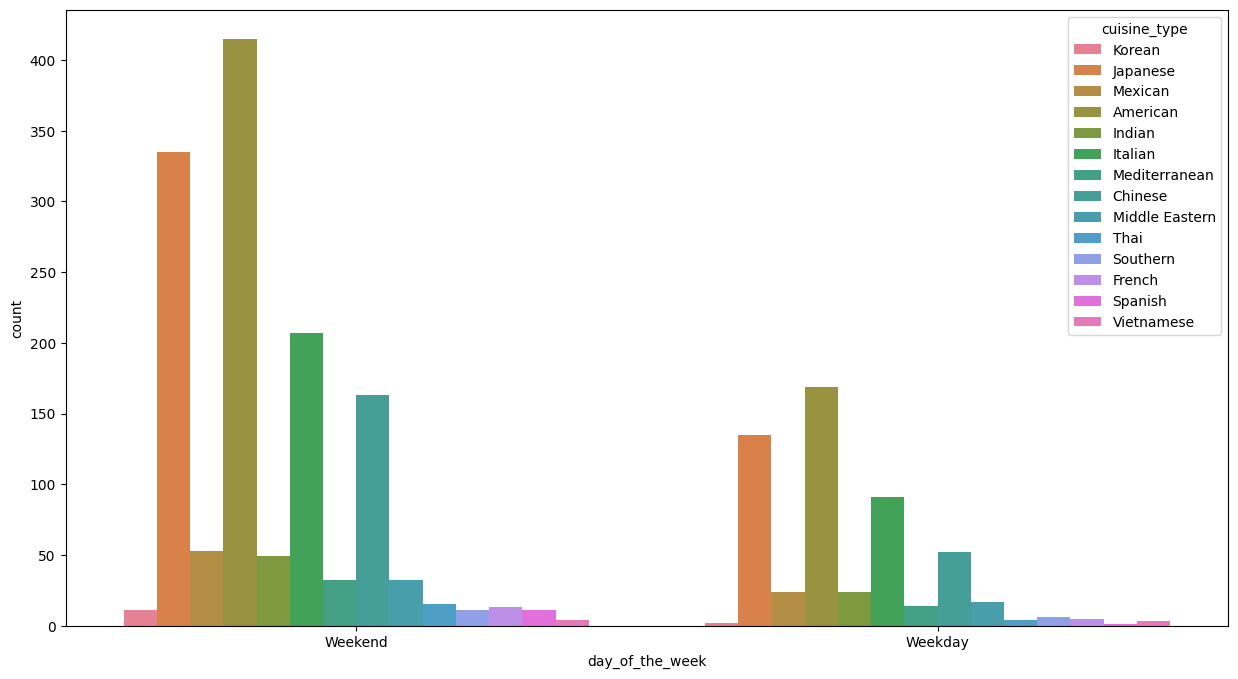

In [ ]:
# Write the code here
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="day_of_the_week",hue='cuisine_type')

* Observations:
On weekend American cuisine is the most popular. Vietnamese cuisine is the least popular on weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

above_20 = df[df['cost_of_the_order'] > 20]  # sort orders that are above $20
count_above_20 = (len(above_20) / len(df)) * 100

print(f"{count_above_20:}%") #print output using



29.24130663856691%


#### Observations:  29.24% of total order cost above $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

mean_delivery = df['delivery_time'].mean()

print("The average time for order delivery is':", round(mean_delivery,1),"minuites")

The average time for order delivery is': 24.2 minuites


* Observations:  It takes approximately 24 minuites for order delivery


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


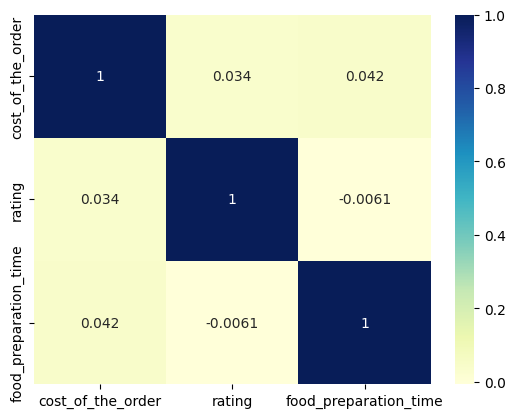

In [ ]:
# Write the code here

sns.heatmap(data=df[['cost_of_the_order','rating','food_preparation_time']].corr(), annot=True, cmap='YlGnBu');

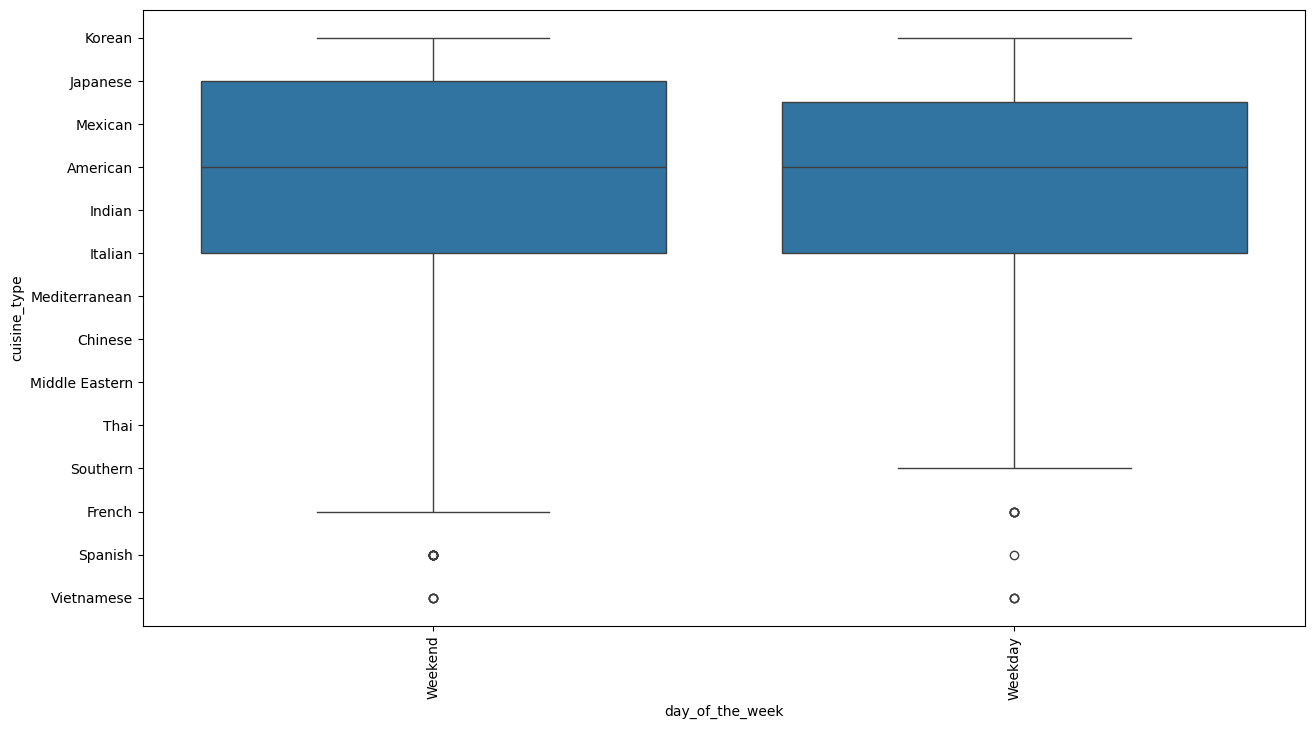

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='day_of_the_week', y='cuisine_type')
plt.xticks(rotation=90);

Food preparation time and cost_of_order appear to have the highet level of corelation.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

restaurant_rating = df[df['rating'] > 50]

print(restaurant_rating)

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

# 25% of orders with cost more than $20
more_than_20 = df[df['cost_of_the_order'] > 20]
expected_for_20 = 0.25 * more_than_20['cost_of_the_order'].sum()

# 15% of orders with cost more than $5
more_than_5 = df[df['cost_of_the_order'] > 5]
expected_for_5 = 0.15 * more_than_5['cost_of_the_order'].sum()

#sum both stream
revenue = expected_for_20 + expected_for_5

#print value
print(revenue)

8379.539499999999


#### Observations: Total reveue for across all orders amounts to $8379.53


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#extract order delivered for a delayed time above 60 minuites
order_time_above_60 = df[df['delivery_time']>60]
#check the percentage among all entries
percentage = (len(order_time_above_60) / len(df)) * 100
#print value
print(percentage)

0.0


#### Observations: By the data shown above, no entry in the dataframe took more than 60 minuites for delivery.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  
From the analysis, American cuisine has the higher order rate both on week days and on weekend.

* There are more orders on weekend. Investment should be focused on American cuisine type.

* The average delivery time is 24 minuites. This can be improved upon.

* More rating is given for orders with faster delivery time.

### Recommendations: From the data , American cuisine is the most orderred on both weekdays and weekends. The food preparation time and delivery time are stable but can be improved upon.

*  

---